# Project 2

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [2]:
#import dataset
original_election_data = pd.read_csv("merged_train.csv")
#original_election_data.head()
#original_election_data.count()

In [3]:
#import dataset
test_data = pd.read_csv("demographics_test.csv")
#test_data.head()

In [4]:
demo_data = original_election_data[original_election_data['Party'] == 1]
repub_data = original_election_data[original_election_data['Party'] != 1]

### Task 1 : Partition dataset into training and validation sets 

In [5]:
#using Holdout method
demo_x_train, demo_x_val, demo_y_train, demo_y_val = train_test_split(demo_data.iloc[:,:-3], demo_data['Democratic'], test_size = 0.25, random_state=0)
repub_x_train, repub_x_val, repub_y_train, repub_y_val = train_test_split(repub_data.iloc[:,:-3], repub_data['Republican'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(original_election_data.iloc[:,:-3], original_election_data['Party'], test_size = 0.25, random_state=0)
x_train.count()

State                                    896
County                                   896
FIPS                                     896
Total Population                         896
Percent White, not Hispanic or Latino    896
Percent Black, not Hispanic or Latino    896
Percent Hispanic or Latino               896
Percent Foreign Born                     896
Percent Female                           896
Percent Age 29 and Under                 896
Percent Age 65 and Older                 896
Median Household Income                  896
Percent Unemployed                       896
Percent Less than High School Degree     896
Percent Less than Bachelor's Degree      896
Percent Rural                            896
dtype: int64

In [7]:
data_x = original_election_data.iloc[:,:-3]
#x_train.head()
data_y = original_election_data['Party']
#y_train

### Task 2 : Standardizing training and validation sets

In [8]:
scaler = StandardScaler()
scaler.fit(demo_x_train.iloc[:,3:])
demo_x_train_scaled = scaler.transform(demo_x_train.iloc[:,3:])
demo_x_train_scaled = pd.DataFrame(demo_x_train_scaled)
demo_x_val_scaled = scaler.transform(demo_x_val.iloc[:,3:])
demo_x_val_scaled = pd.DataFrame(demo_x_val_scaled)
#demo_x_train_scaled

In [9]:
scaler = StandardScaler()
scaler.fit(repub_x_train.iloc[:,3:])
repub_x_train_scaled = scaler.transform(repub_x_train.iloc[:,3:])
repub_x_train_scaled = pd.DataFrame(repub_x_train_scaled)
repub_x_val_scaled = scaler.transform(repub_x_val.iloc[:,3:])
repub_x_val_scaled = pd.DataFrame(repub_x_val_scaled)

In [10]:
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,3:])
x_train_scaled = scaler.transform(x_train.iloc[:,3:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,3:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [11]:
scaler = StandardScaler()
scaler.fit(data_x.iloc[:,3:])
data_x_scaled = scaler.transform(data_x.iloc[:,3:])
data_x_scaled = pd.DataFrame(data_x_scaled)

In [12]:
scaler = StandardScaler()
scaler.fit(test_data.iloc[:,3:])
test_data_scaled = scaler.transform(test_data.iloc[:,3:])
test_data_scaled = pd.DataFrame(test_data_scaled)

### Task 3 : Build Linear Regression Model

#### For Democratic Party

In [13]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[103624.81621321  -4266.71421325  -3820.7434915   -4479.42316769
  -5484.01243206    413.41199685 -11448.16943487  -4760.86121281
   -717.04138946   2886.76855164   5759.19791935 -24072.38083839
  -3283.54262932]
67233.13168724279


In [14]:
predicted = fitted_model.predict(demo_x_val_scaled)
print(predicted[:20])

[ 3.55345293e+04 -3.41035108e+02  2.89390534e+05  4.14102847e+04
  3.00780006e+04  3.03459723e+04  1.25468324e+05  5.04936887e+04
  8.70978445e+03  2.78846632e+04 -2.12333378e+02 -4.98143159e+03
  2.99071080e+05  7.87689350e+04  2.11997955e+05  2.47360546e+03
 -1.13971996e+04 -1.11836045e+04  1.03623570e+05  1.02778385e+05]


In [15]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9559842733712435
0.9139059309331444
0.8989330493563


In [16]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled, y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9062568819285339
0.8899537309595833


In [17]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43373.8217794965
154265650092.28104
1881288415.7595248
43373.8217794965


#### Testing diffferent attributes

In [18]:
cols = [0,1,3,6,7,8,10,11,12]

In [19]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled.iloc[:,cols], y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[102074.77007954  -2381.80053151  -4242.38643286 -10311.61012848
  -4447.05377677  -2839.84893521   3614.61693955 -21598.7617853
  -2195.3412144 ]
67233.13168724279


In [20]:
predicted = fitted_model.predict(demo_x_val_scaled.iloc[:, cols])

In [21]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:, cols].columns-1))
print(adj_R_squared)

0.956610293742668
0.9151032540944336
0.9057995011184812


In [22]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled.iloc[:,cols], y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:,cols].columns)-1)
print(adj_R_squared)

0.9062548159110984
0.8945366678999856


In [23]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
predicted = fitted_model.predict(demo_x_val_scaled)
print(fitted_model.coef_)
corr_coef = np.corrcoef(predicted, demo_y_val)[1, 0]
print(corr_coef)
R_squared = corr_coef**2
print(R_squared)

[103623.97434884  -4254.43816627  -3809.80303354  -4469.69192891
  -5476.05800857    411.04272432 -11433.03597548  -4751.13757419
   -708.99432655   2890.89083273   5750.10989291 -24061.30087688
  -3277.41195905]
0.9559874900128552
0.9139120810610789


In [24]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43372.444133994126
154255850632.82822
1881168910.1564417
43372.444133994126


In [25]:
#demo_x_train_scaled.head()

In [26]:
demo_x_train.iloc[:,3:].mean()

Total Population                         274659.238683
Percent White, not Hispanic or Latino        70.684327
Percent Black, not Hispanic or Latino         9.557471
Percent Hispanic or Latino                   10.632678
Percent Foreign Born                          7.199469
Percent Female                               50.398727
Percent Age 29 and Under                     38.759771
Percent Age 65 and Older                     16.271177
Median Household Income                   53588.407407
Percent Unemployed                            6.863873
Percent Less than High School Degree         11.679167
Percent Less than Bachelor's Degree          72.279062
Percent Rural                                37.611821
dtype: float64

#### For Republic Party

In [27]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[20959.79427444  1073.48906332    26.5507054    519.20511435
   160.1325564   -219.55535432  -795.00206857  1142.94276452
  1519.76548773   409.04285069   625.62619945  -589.5266056
  -282.89398987]
12655.983128834358


In [28]:
predicted = fitted_model.predict(repub_x_val_scaled)
print(predicted[:5])

[10845.75805198 24983.35644565 35797.76474502  2213.69567533
  1113.58400542]


In [29]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.9827560742690562
0.9658095015127267
0.9638081064793254


In [30]:
R_squared_ = fitted_model.score(X = repub_x_val_scaled, y = repub_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.956582314849456
0.9540407918162535


In [31]:
rms = m.sqrt(mean_squared_error(repub_y_val, predicted))
print(rms)

5032.5002019522135


In [32]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled.iloc[:,cols], y = repub_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[21018.11253873   725.86761074   295.64110363  -934.89463146
  1032.36518771  1434.13483374   745.1477571   -510.04115938
  -345.71636508]
12655.983128834358


In [33]:
predicted = fitted_model.predict(repub_x_val_scaled.iloc[:, cols])

In [34]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.iloc[:, cols].columns-1))
print(adj_R_squared)

0.9825096087173947
0.965325131222008
0.9639978635175873


In [35]:
R_squared_ = fitted_model.score(X = repub_x_val_scaled.iloc[:,cols], y = repub_y_val)
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.iloc[:,cols].columns)-1)
print(adj_R_squared)

0.9559605122178177
0.9540549574580118


In [36]:
rms = m.sqrt(mean_squared_error(repub_y_val, predicted))
print(rms)
print(((repub_y_val-predicted)**2).sum())   #rss
print(np.mean((repub_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((repub_y_val-predicted)**2)))

5068.408353824111
5600150386.5628605
25688763.241114035
5068.408353824111


### Task 4 : Build Classification Model

#### k Nearest

In [861]:
classifier = KNeighborsClassifier(n_neighbors = 11, weights ='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [862]:
y_pred = classifier.predict(x_val_scaled)

[[211  11]
 [ 42  35]]


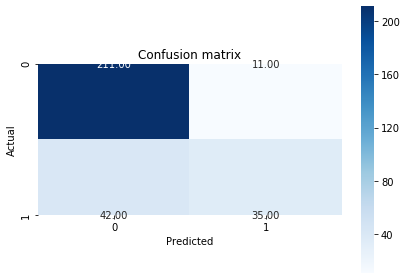

In [863]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [864]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.822742474916388, 0.17725752508361203, array([0.83399209, 0.76086957]), array([0.95045045, 0.45454545]), array([0.88842105, 0.56910569])]


In [916]:
cols = [3,5,6,7,8,9,11,12]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled.iloc[:,cols],y_train)
    y_pred = classifier.predict(x_val_scaled.iloc[:,cols])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])


[1, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[2, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[3, 0.8193979933110368, 0.1806020066889632, array([0.836     , 0.73469388]), array([0.94144144, 0.46753247]), array([0.88559322, 0.57142857])]
[4, 0.802675585284281, 0.19732441471571904, array([0.83265306, 0.66666667]), array([0.91891892, 0.46753247]), array([0.87366167, 0.54961832])]
[5, 0.8093645484949833, 0.1906354515050167, array([0.83673469, 0.68518519]), array([0.92342342, 0.48051948]), array([0.87794433, 0.5648855 ])]
[6, 0.8160535117056856, 0.18394648829431437, array([0.83805668, 0.71153846]), array([0.93243243, 0.48051948]), array([0.88272921, 0.57364341])]
[7, 0.8260869565217391, 0.17391304347826086, array([0.84274194, 0.74509804]), array([0.94144144, 0.49350649]), array([0.8893617, 0.59375  ]

#### Testing different attributes

In [887]:
cols = [3,5,6,7,8,9,11,12]

In [888]:
classifier = KNeighborsClassifier(n_neighbors = 11)  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [889]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [890]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8461538461538461, 0.15384615384615385, array([0.84920635, 0.82978723]), array([0.96396396, 0.50649351]), array([0.90295359, 0.62903226])]


[[212  10]
 [ 36  41]]


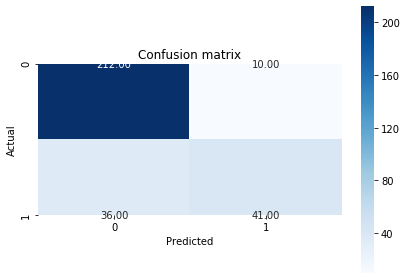

In [526]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

#### SVM

In [410]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [411]:
y_pred = classifier.predict(x_val_scaled)

[[216   6]
 [ 37  40]]


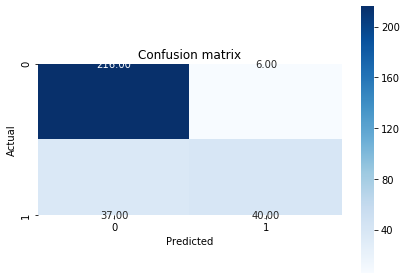

In [412]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [413]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


#### Testing different attributes

In [773]:
cols = [2,3,6,7,8,9,11,12]

In [774]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [775]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [776]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85943775, 0.84      ]), array([0.96396396, 0.54545455]), array([0.90870488, 0.66141732])]


[[210  12]
 [ 44  33]]


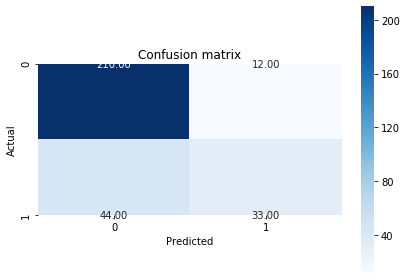

In [706]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

## Task 4 : Build Clustering model

### K Means

In [1174]:
cols = [2,4,7,8,11,10]
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled.iloc[:,cols])
clusters = clustering.labels_
len(clusters)

1195

In [1175]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,cols],clusters)
print([adjusted_rand_index, silhouette_coefficient])

[0.2712192205336508, 0.3329964236009124]


[[773 159]
 [ 97 166]]


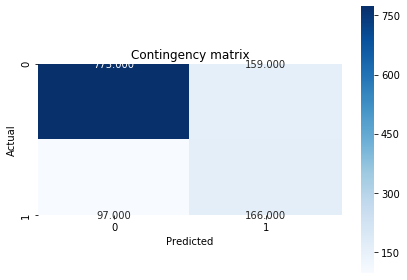

In [1161]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

In [ ]:
# Plot clusters found using K-Means clustering
x_train['clusters'] = clusters
ax = x_train.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = x_train.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

[[771 161]
 [ 99 164]]


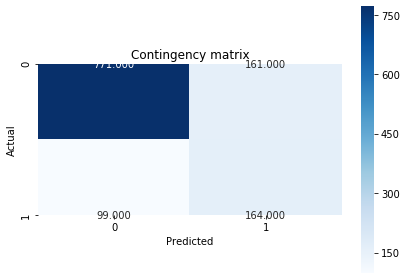

In [1176]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

### Hierarchical clustering complete linking

In [930]:
clustering = linkage(data_x_scaled,method='complete', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [934]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print([adjusted_rand_index, silhouette_coefficient])

[0.016835428116791826, 0.6180072991309411]


[[  0   6]
 [870 319]]


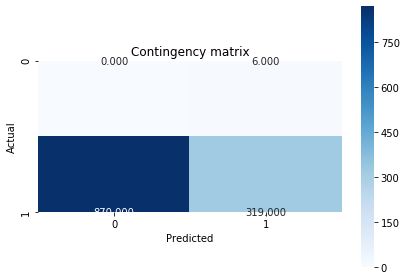

In [935]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

### Hierarchical clustering single linking

In [937]:
clustering = linkage(data_x_scaled,method='single', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [938]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print([adjusted_rand_index, silhouette_coefficient])

[-0.001047512629882871, 0.6487451770620387]


[[869 325]
 [  1   0]]


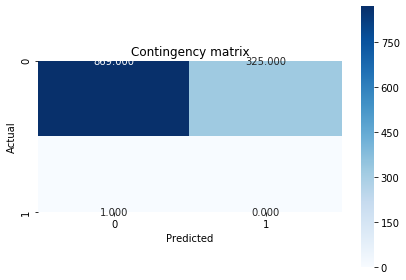

In [939]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

### DBSCAN

In [ ]:
clustering = DBSCAN(eps = 2, min_samples = 5, metric='euclidean').fit(data_x_scaled)
clusters = clustering.labels_

In [940]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print([adjusted_rand_index, silhouette_coefficient])

[-0.001047512629882871, 0.6487451770620387]


[[869 325]
 [  1   0]]


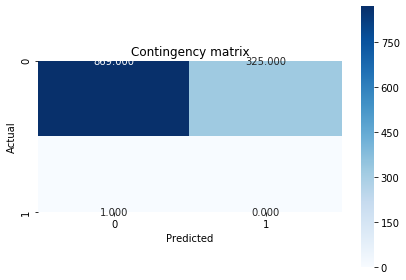

In [941]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)